#İSTKA SİBER AKADEMİ 29-10-2024 Yapay Zeka Dersi Çalışmaları

Çalışmalarından faydalandığım değerli hocam Ali ÇETİNKAYA'nın açık kaynak kodlu linki : https://github.com/acetinkaya/ai_igu/tree/main


#Bulanık Mantık Tabanlı Komisyon (Bahşiş) Belirleme Uygulaması

Python programlama dilinde; Bulanık mantık işlemlerini "scikit-fuzzy" ile gerçekleştirilmektedir.



In [177]:
print("Merhaba, İGÜ - YAPAY ZEKA")

Merhaba, İGÜ - YAPAY ZEKA


In [178]:
import sys
print(sys.version)

3.10.12 (main, Sep 11 2024, 15:47:36) [GCC 11.4.0]


In [179]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [180]:
import os
os.chdir('/content/drive/MyDrive/igu_Yapay_Zeka')
!pwd

/content/drive/MyDrive/igu_Yapay_Zeka


In [181]:
!pip install scikit-fuzzy # Kütüphanesi tanımlı olmayan yüklenme işlemi

In [182]:
import sys
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
# Bulanık mantık işlemleri için kullanılır.
import skfuzzy as fuzz

#Sürümleri Yazdırma
print("Python sürüm no: ", sys.version)
print("Pandas sürüm no: ", pd.__version__)
print("Matplotlib Version:", matplotlib.__version__)
print("Skfuzzy Version no:", fuzz.__version__)
print("Numpy Version no:", np.__version__)

Python sürüm no:  3.10.12 (main, Sep 11 2024, 15:47:36) [GCC 11.4.0]
Pandas sürüm no:  2.2.2
Matplotlib Version: 3.7.1
Skfuzzy Version no: 0.5.0
Numpy Version no: 1.26.4


#Üyelik Fonksiyonları
Üyelik fonksiyonları, belirli bir değerin, tanımlı bir bulanık küme içinde ne kadar "üye" olduğunu belirler. Burada, servis kalitesi, yemek kalitesi ve bahşiş miktarı için üç farklı aralık tanımlanmıştır.

Bu kod bloğu servis, yemek, bahşiş aralığını ayarlamamıza yarıyor.
Servisde 0'dan 10'a kadar değerlendirme yaptırır.
Yemekde 0'dan 10'a kadar değerlendirme yaptırır.
Bahşişde 0'dan 100'e kadar değerlendirme yaptırır.

In [183]:
servis = np.arange(0, 11, 1)
yemek = np.arange(0, 11, 1)
bahsis = np.arange(0, 101, 1)

In [184]:
SKK = fuzz.trimf(servis, [0, 0, 5])
SKO = fuzz.trimf(servis, [0, 5, 10])
SKI = fuzz.trimf(servis, [5, 10, 10])

In [185]:
YK = fuzz.trimf(yemek, [0, 0, 5])
YO = fuzz.trimf(yemek, [0, 5, 10])
YI = fuzz.trimf(yemek, [5, 10, 10])

In [186]:
BCK = fuzz.trimf(bahsis, [0, 0, 30])
BK = fuzz.trimf(bahsis, [20, 35, 50])
BO = fuzz.trimf(bahsis, [40, 55, 70])
BI = fuzz.trimf(bahsis, [60, 70, 80])
BCI = fuzz.trimf(bahsis, [70, 100, 100])

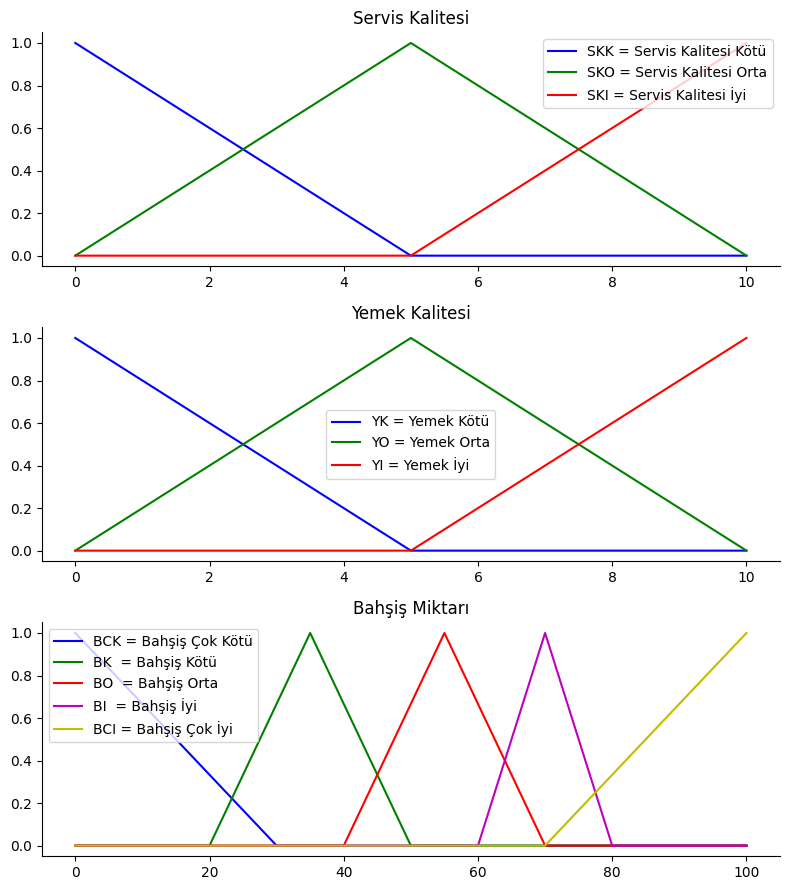

In [187]:
fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, figsize=(8, 9))

ax0.plot(servis, SKK, 'b', linewidth=1.5, label='SKK = Servis Kalitesi Kötü')
ax0.plot(servis, SKO, 'g', linewidth=1.5, label='SKO = Servis Kalitesi Orta')
ax0.plot(servis, SKI, 'r', linewidth=1.5, label='SKI = Servis Kalitesi İyi')
ax0.set_title('Servis Kalitesi')
ax0.legend()

ax1.plot(yemek, YK, 'b', linewidth=1.5, label='YK = Yemek Kötü')
ax1.plot(yemek, YO, 'g', linewidth=1.5, label='YO = Yemek Orta')
ax1.plot(yemek, YI, 'r', linewidth=1.5, label='YI = Yemek İyi')
ax1.set_title('Yemek Kalitesi')
ax1.legend()

ax2.plot(bahsis, BCK, 'b', linewidth=1.5, label='BCK = Bahşiş Çok Kötü')
ax2.plot(bahsis, BK, 'g',  linewidth=1.5, label='BK  = Bahşiş Kötü')
ax2.plot(bahsis, BO, 'r',  linewidth=1.5, label='BO  = Bahşiş Orta')
ax2.plot(bahsis, BI, 'm',  linewidth=1.5, label='BI  = Bahşiş İyi ')
ax2.plot(bahsis, BCI, 'y', linewidth=1.5, label='BCI = Bahşiş Çok İyi')
ax2.set_title('Bahşiş Miktarı')
ax2.legend()

for ax in (ax0, ax1, ax2):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()

In [206]:
# Kullanıcıdan puanları al
servis_puan = float(input('Servis Kalitesini 0 ile 10 puan arasında oylayınız!'))
yemek_puan = float(input('Yemek Kalitesini 0 ile 10 puan arasında oylayınız!'))


Servis Kalitesini 0 ile 10 puan arasında oylayınız!10
Yemek Kalitesini 0 ile 10 puan arasında oylayınız!2


#Ağırlıklı Puan Hesaplama

Servis ve yemek kalitesi için ağırlıklar tanımlanır ve toplam puan hesaplanır.

Sonucun daha belirgin görülmesi adına servis'e yüzde 90 değer atanıştır.

In [207]:
# Ağırlıkları tanımlama
servis_agirlik = 0.9
yemek_agirlik = 0.1

# Ağırlıklı puanları hesaplatma
agirlikli_servis_puan = servis_puan * servis_agirlik
agirlikli_yemek_puan = yemek_puan * yemek_agirlik

# Toplam ağırlıklı puan
toplam_puan = agirlikli_servis_puan + agirlikli_yemek_puan

#Üyelik Derecelerinin Hesaplanması
Toplam puana göre her bir üyelik fonksiyonu için üyelik dereceleri hesaplanır.

In [208]:
servis_kotu = fuzz.interp_membership(servis, SKK, float(toplam_puan))
servis_orta = fuzz.interp_membership(servis, SKO, float(toplam_puan))
servis_iyi = fuzz.interp_membership(servis, SKI, float(toplam_puan))

yemek_kotu = fuzz.interp_membership(yemek, YK, float(toplam_puan))
yemek_orta = fuzz.interp_membership(yemek, YO, float(toplam_puan))
yemek_iyi = fuzz.interp_membership(yemek, YI, float(toplam_puan))

#Bulanık Kural Setleri ve Sonuç Hesaplama
Belirlenen kurallar ile bulanık sonuçlar hesaplanır. durulama_islemi, bulanık sonuçların bir noktaya indirgenmesidir.

In [209]:
Kural1 = np.fmin(servis_kotu, yemek_kotu)
Kontrol_kural1 = np.fmin(Kural1, BCK)

Kural2 = np.fmin(servis_kotu, yemek_orta)
Kontrol_kural2 = np.fmin(Kural2, BK)

Kural3 = np.fmin(servis_orta, yemek_orta)
Kontrol_kural3 = np.fmin(Kural3, BO)

Kural4 = np.fmin(servis_orta, yemek_iyi)
Kontrol_kural4 = np.fmin(Kural4, BI)

Kural5 = np.fmin(servis_iyi, yemek_kotu)
Kontrol_kural5 = np.fmin(Kural5, BO)

Kural6 = np.fmin(servis_iyi, yemek_iyi)
Kontrol_kural6 = np.fmin(Kural6, BCI)

In [210]:
ctr0 = np.zeros_like(bahsis)

c1 = np.fmax(Kontrol_kural1, Kontrol_kural2)
c2 = np.fmax(Kontrol_kural3, Kontrol_kural4)
c3 = np.fmax(Kontrol_kural5, Kontrol_kural6)

c4 = np.fmax(c2, c3)

toplanan_kurallar = np.fmax(c1,c4)

#Centroid of Area (Alanın Centroidi) Yöntemi

In [211]:
durulama_islemi = fuzz.defuzz(bahsis, toplanan_kurallar, 'centroid')
islem_sonucu = fuzz.interp_membership(bahsis, toplanan_kurallar, durulama_islemi)

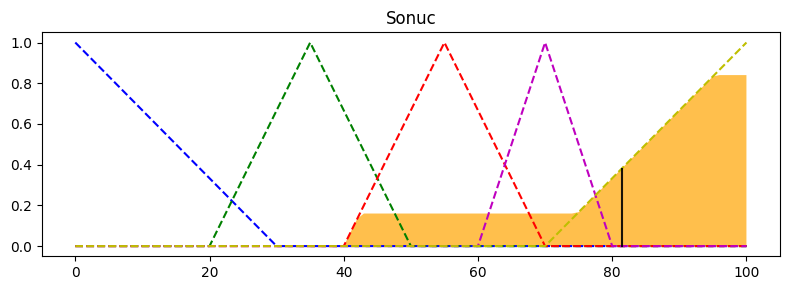

Bahsis_miktarı =  81.40204081632652  TL


In [212]:
fig, ax4 = plt.subplots(figsize=(8,3))

ax4.plot(bahsis, BCK, 'b', linewidth=1.5, linestyle='--')
ax4.plot(bahsis, BK, 'g',  linewidth=1.5, linestyle='--')
ax4.plot(bahsis, BO, 'r',  linewidth=1.5, linestyle='--')
ax4.plot(bahsis, BI, 'm',  linewidth=1.5, linestyle='--')
ax4.plot(bahsis, BCI, 'y', linewidth=1.5, linestyle='--')

ax4.fill_between(bahsis, ctr0, toplanan_kurallar, facecolor='orange', alpha=0.7)
ax4.plot([durulama_islemi, durulama_islemi], [0, islem_sonucu], 'k', linewidth=1.5, alpha=0.9)
ax4.set_title('Sonuc')
plt.tight_layout()
plt.show()

print("Bahsis_miktarı = ", durulama_islemi, " TL")

#Max of Maximum Yöntemi

In [213]:
# Centroid yerine maksimum üyelik yöntemi kullanma
durulama_islemi = bahsis[np.argmax(toplanan_kurallar)]

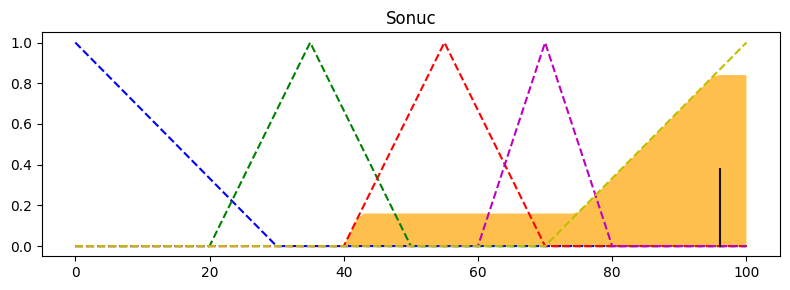

Bahsis_miktarı =  96  TL


In [214]:
fig, ax4 = plt.subplots(figsize=(8,3))

ax4.plot(bahsis, BCK, 'b', linewidth=1.5, linestyle='--')
ax4.plot(bahsis, BK, 'g',  linewidth=1.5, linestyle='--')
ax4.plot(bahsis, BO, 'r',  linewidth=1.5, linestyle='--')
ax4.plot(bahsis, BI, 'm',  linewidth=1.5, linestyle='--')
ax4.plot(bahsis, BCI, 'y', linewidth=1.5, linestyle='--')

ax4.fill_between(bahsis, ctr0, toplanan_kurallar, facecolor='orange', alpha=0.7)
ax4.plot([durulama_islemi, durulama_islemi], [0, islem_sonucu], 'k', linewidth=1.5, alpha=0.9)
ax4.set_title('Sonuc')
plt.tight_layout()
plt.show()

print("Bahsis_miktarı = ", durulama_islemi, " TL")

#SONUÇ
Fuzzy kontrol sistemi kullanarak servis kalitesi, yemek kalitesi ve buna bağlı olarak bahşiş miktarını tahmin etmektedir. Program, kullanıcılardan alınan puanlara ve yüzdeliklere göre bahşiş miktarını belirlemek için fuzzy mantık yöntemlerini kullanır.

Centroid ve Max of Maximum yöntemleri kullanılarak da farklı sonuçlar elde edilebileceği görüntülenmiştir.